In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

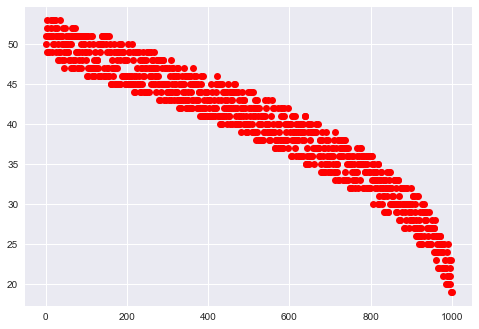

In [3]:
noiseSize = 3
size = 1000

sample = np.arange(size*2).reshape( (2, size) )
sample[1] = np.sqrt(size - sample[0]) + 20

# sample[1] = 5 * sample[0] + 800
# sample[1][0] = 0
    
sample[1] = sample[1] + (np.random.rand(1,size) - .5) * noiseSize*2
sample = sample.T

plt.plot(sample[:,0], sample[:,1], 'ro')

In [4]:
data = sample
n = 2
m = data.shape[0]
scaleInfo = []

x = data[:, :n-1]
x = np.concatenate((np.ones((1,m)), x.T)).T

for i in range(0, n):
    scaleInfo.append( [ x[:,i].min(), x[:,i].mean(), x[:,i].max()] )
    
for i in range(1, n):
    for j in range(0, m):
        r = scaleInfo[i][2] - scaleInfo[i][0]
        if r != 0:
            x[j][i] = ( x[j][i] - scaleInfo[i][1] ) / r
        else:
            x[j][i] = ( x[j][i] - scaleInfo[i][1] ) / 1

y = np.array( data[:,-1] )
y = y.T

print(x)

[[ 1.       -0.5     ]
 [ 1.       -0.498999]
 [ 1.       -0.497998]
 ..., 
 [ 1.        0.497998]
 [ 1.        0.498999]
 [ 1.        0.5     ]]


theta: [ 39.92296107 -24.24774221]


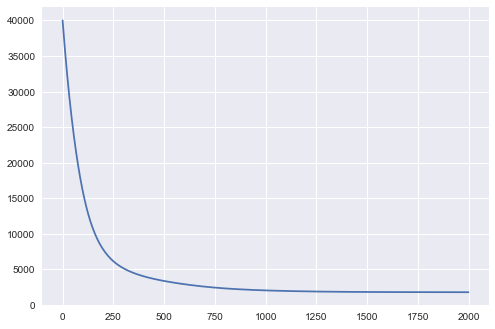

In [5]:
autoAlphaSelect = False
iterCount = 2000
alpha = 0.01
theta = np.array(n * [0])

j = []
complete = False

while( not complete ):
    complete = True
    for _ in range(0, iterCount):
        h = np.dot(x , theta)
        loss = h - y
        gradient = np.dot(loss , x)
        theta = theta - alpha / m * gradient
        j += [ abs(np.array(loss)).sum() ]
        
        for i in range(0,n):
            theta[i] = theta[i] - (alpha / m * x[:,1].dot(loss))
        
        # fix big alpha
        if ( autoAlphaSelect and j[ len(j)-1 ] > j[ len(j)-2 ]):
            complete = False
            alpha = alpha / 10
            print('alpha:', alpha)
            theta = np.array(n * [0])
            j.clear()
            break

print('theta:', theta )
plt.plot(j)

(0, 52.046832174907209) (999, 27.799089966630316)


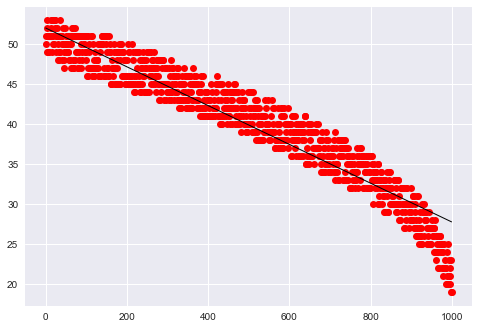

In [6]:
def scale(a, scaleInfo):
    result = [1]
    for i in range(1, n):
        r = scaleInfo[i][2] - scaleInfo[i][0]
        if r != 0:
            result += [( a[i-1] - scaleInfo[i][1] ) / r]
        else:
            result += [( a[i-1] - scaleInfo[i][1] ) / 1]
    return result

a = (0, np.array(scale([0], scaleInfo)).dot(theta))
b = (m-1, np.array(scale([m-1], scaleInfo)).dot(theta))

print( a, b)
            
plt.plot(sample[:,0], sample[:,1], 'ro')
plt.plot([ a[0], b[0] ], [ a[1], b[1] ], 'k-', lw=1)

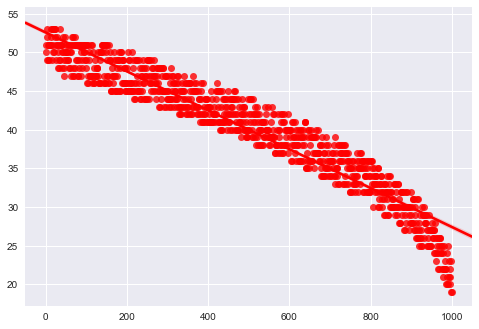

In [7]:
sns.regplot(sample[:,0], sample[:,1], color='red')